In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	57
float64		column 2	95
float64		column 3	57
float64		column 4	38
float64		column 5	114
float64		column 6	114
float64		column 7	38
float64		column 8	95


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,711.000000,673.000000,711.000000,730.000000,654.000000,654.000000,730.000000,673.000000
mean,3.822785,120.836553,69.202532,20.632877,81.247706,31.946942,0.464312,33.063893
std,3.381322,32.096627,19.318707,15.899013,116.861837,7.791473,0.317621,11.673016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.240000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.000000,0.365500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.300000,0.612750,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.288000,81.000000


<AxesSubplot:>

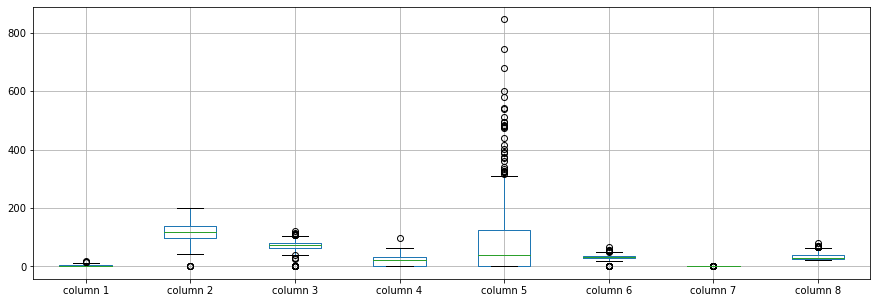

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.822785
column 2    120.836553
column 3     69.202532
column 4     20.632877
column 5     81.247706
column 6     31.946942
column 7      0.464312
column 8     33.063893
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.134593,0.157356,-0.080807,-0.065318,-0.003201,0.002544,0.531866
column 2,0.134593,1.000000,0.128102,0.036397,0.335494,0.188141,0.111444,0.271849
column 3,0.157356,0.128102,1.000000,0.198684,0.065448,0.302583,0.050710,0.255267
column 4,-0.080807,0.036397,0.198684,1.000000,0.419148,0.366378,0.157027,-0.085708
column 5,-0.065318,0.335494,0.065448,0.419148,1.000000,0.194682,0.113962,-0.024382
column 6,-0.003201,0.188141,0.302583,0.366378,0.194682,1.000000,0.102353,0.052791
column 7,0.002544,0.111444,0.050710,0.157027,0.113962,0.102353,1.000000,0.050663
column 8,0.531866,0.271849,0.255267,-0.085708,-0.024382,0.052791,0.050663,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+22,8+22+22,8+22+22+22,8+22+22+22+22,8+22+22+22+22+22,8+22+22+22+22,8+22+22+22,8+22+22,8+22,8], vae_layer = False, seed = 22)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 377.2796548207601
Epoch: 1 , loss: 376.34636942545575
Epoch: 2 , loss: 378.71301523844403
Epoch: 3 , loss: 378.60707092285156
Epoch: 4 , loss: 377.40839862823486
Epoch: 5 , loss: 377.6169516245524
Epoch: 6 , loss: 375.6134198506673
Epoch: 7 , loss: 374.4373251597087
Epoch: 8 , loss: 370.6986026763916
Epoch: 9 , loss: 359.9476795196533
Epoch: 10 , loss: 339.4284013112386
Epoch: 11 , loss: 331.22222836812335
Epoch: 12 , loss: 321.41637166341144
Epoch: 13 , loss: 317.98137442270917
Epoch: 14 , loss: 311.56921831766766
Epoch: 15 , loss: 304.57321612040204
Epoch: 16 , loss: 301.5603377024333
Epoch: 17 , loss: 300.24112860361737
Epoch: 18 , loss: 297.2774353027344
Epoch: 19 , loss: 295.10472170511883
Epoch: 20 , loss: 296.3507029215495
Epoch: 21 , loss: 297.8282464345296
Epoch: 22 , loss: 296.13138008117676
Epoch: 23 , loss: 294.6830008824666
Epoch: 24 , loss: 289.4792070388794
Epoch: 25 , loss: 282.814330418

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1707.6169403756521, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.29561056009927117

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_AW_10.xlsx", index=False, header=False)